# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
### Estudiante: Ana Paulina Olivares Álvarez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



In [ ]:
'''
Pseudocódigo:

Ingresar la velocidad (moto)
Ingresar la aceleración (policía)

t = 0 y x_i = 0
Definir ecuación mru (moto) x_moto = v_moto * t
Definir ecuación mrua (policia) x_policia = 0.5 * a_policia * t^2

Despejar ecuación para t_captura
  t_captura = (2 * v_moto) / a_policia

Imprimir resultado
'''

In [8]:
v_moto = float(input('Ingrese la velocidad de la moto (m/s): '))
a_policia = float(input('Ingrese la aceleración del policía (m/s^2): '))

x_moto = v_moto * t
x_policia = 0.5 * a_policia * t**2
t_captura = (2*v_moto)/a_policia

print(f'Se encuentran en t = {t_captura} segundos')

Ingrese la velocidad de la moto (m/s): 15
Ingrese la aceleración del policía (m/s^2): 3
Se encuentran en t = 10.0 segundos


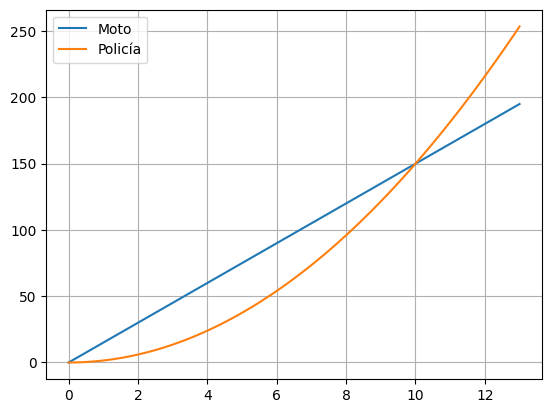

In [9]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, t_captura + 3, 100)

# Grafica
plt.plot(t, x_moto, label='Moto')
plt.plot(t, x_policia, label='Policía')
plt.grid(True)
plt.legend()
plt.show()

---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/6}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/6}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




In [3]:
def potencial_lj(r, epsilon, sigma):

    a = (sigma / r)**12
    b = (sigma / r)**6
    V = 4 * epsilon * (a - b)
    return V

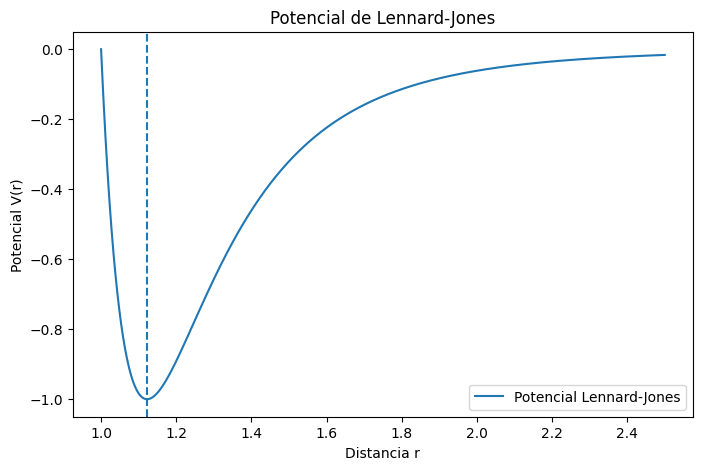

In [15]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1
epsilon = 1

r = np.linspace(1, 2.5 * sigma, 10000) # generar un array entre r = 1 y r = 2.5*sigma para evaluar el potencial
V = potencial_lj(r, epsilon, sigma)

r_m = 2**(1/6) * sigma
V_m = potencial_lj(r_m, epsilon, sigma)

plt.figure(figsize=(8, 5))
plt.plot(r, V, label="Potencial Lennard-Jones")

plt.title('Potencial de Lennard-Jones')
plt.xlabel('Distancia r')
plt.ylabel('Potencial V(r)')
plt.axvline(r_m, linestyle='--')
plt.legend()
plt.show()


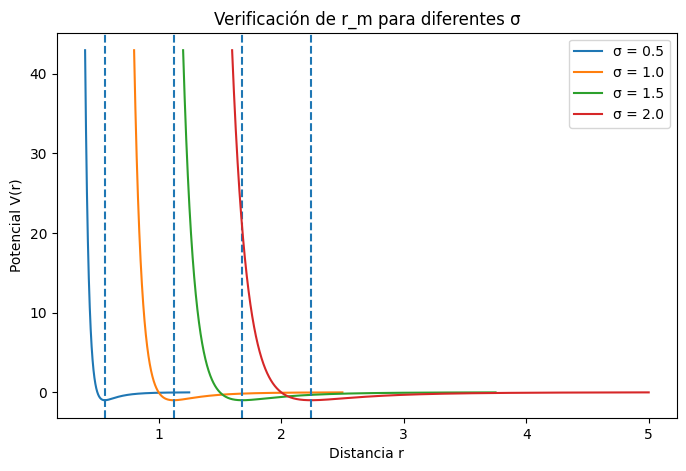

In [18]:
sigma_valores = [0.5, 1.0, 1.5, 2.0]

plt.figure(figsize=(8, 5))

for sigma in sigma_valores:
    r = np.linspace(0.8 * sigma, 2.5 * sigma, 10000)
    V = potencial_lj(r, epsilon, sigma)

    r_m = 2**(1/6) * sigma
    V_m = potencial_lj(r_m, epsilon, sigma)

    plt.plot(r, V, label=f"σ = {sigma}")
    plt.axvline(r_m, linestyle='--')

plt.title('Verificación de r_m para diferentes σ')
plt.xlabel('Distancia r')
plt.ylabel('Potencial V(r)')
plt.legend()
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [10]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

El primer dataset muestra las alturas medias de niñ@s de 19 años.


In [11]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]
alturas

,Unnamed: 0,Country,"Average Height, Boys, 19 yo (cm)↓",Girls 19 (cm),Boys 19 (in),Girls 19 (in)
0,NaN,Netherlands,184,170,6 ft.,5 ft. 7 in.
1,NaN,Montenegro,183,170,6 ft.,5 ft. 7 in.
2,NaN,Estonia,183,169,6 ft.,5 ft. 6 in.
3,NaN,Bosnia and Herzegovina,182,167,6 ft.,5 ft. 6 in.
4,NaN,Iceland,182,169,6 ft.,5 ft. 7 in.
...,...,...,...,...,...,...
191,NaN,Papua New Guinea,163,157,5 ft. 4 in.,5 ft. 2 in.
192,NaN,Solomon Islands,163,157,5 ft. 4 in.,5 ft. 2 in.
193,NaN,Laos,163,153,5 ft. 4 in.,5 ft.
194,NaN,Timor-Leste,160,153,5 ft. 3 in.,5 ft.


a. Limpie los datos, eliminando columnas en (in) y cambie todos los nombres de las columnas al español.

In [12]:
print(alturas.columns)

Index(['Unnamed: 0', 'Country', 'Average Height, Boys, 19 yo (cm)↓',
       'Girls 19 (cm)', 'Boys 19 (in)', 'Girls 19 (in)'],
      dtype='object')


In [13]:
# Dataset 1
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

alturas = alturas.drop(columns=['Boys 19 (in)', 'Girls 19 (in)', 'Unnamed: 0']) #Elimina las columnas
alturas.columns = ['País', 'Hombres (cm)', 'Mujeres (cm)'] #Renombra las columnas
alturas

,País,Hombres (cm),Mujeres (cm)
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
...,...,...,...
191,Papua New Guinea,163,157
192,Solomon Islands,163,157
193,Laos,163,153
194,Timor-Leste,160,153


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

In [14]:
alturas = alturas.sort_values(by='Hombres (cm)', ascending=False)

primeros_10 = alturas.head(10)
ultimos_10 = alturas.tail(10)

colombia = alturas[alturas['País'] == 'Colombia'] # Seleccionar a Colombia

hombres = pd.concat([primeros_10, ultimos_10, colombia])
hombres = hombres.sort_values(by='Hombres (cm)', ascending=False)
hombres

,País,Hombres (cm),Mujeres (cm)
0,Netherlands,184,170
1,Montenegro,183,170
2,Estonia,183,169
3,Bosnia and Herzegovina,182,167
4,Iceland,182,169
5,Denmark,182,169
6,Czech Republic,181,168
7,Latvia,181,169
8,Slovakia,181,167
9,Ukraine,181,167


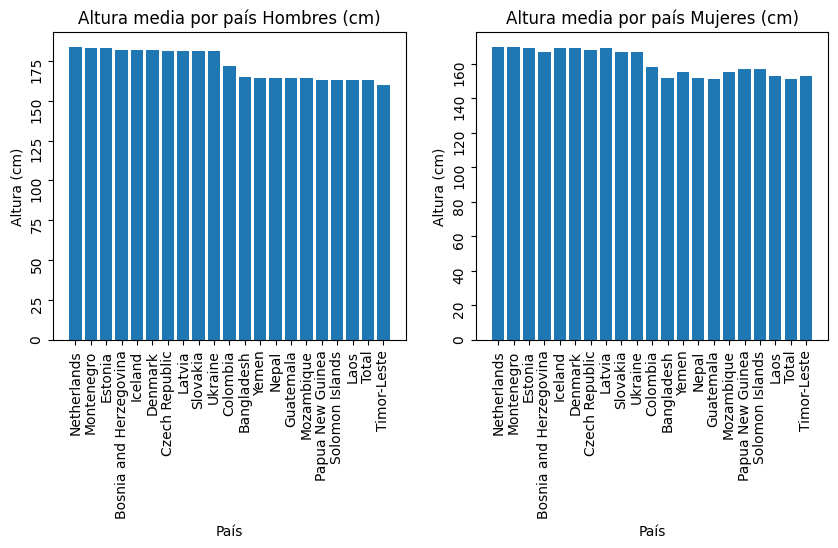

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico altura hombres
axes[0].bar(hombres['País'], hombres['Hombres (cm)'])
axes[0].set_title("Altura media por país Hombres (cm)")
axes[0].set_xlabel("País")
axes[0].set_ylabel("Altura (cm)")
axes[0].tick_params(rotation=90)

# Gráfico alturas mujeres
axes[1].bar(hombres['País'], hombres['Mujeres (cm)'])
axes[1].set_title("Altura media por país Mujeres (cm)")
axes[1].set_xlabel("País")
axes[1].set_ylabel("Altura (cm)")
axes[1].tick_params(rotation=90)

plt.show()

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset income, haga un merge con el dataset alturas. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación



In [35]:
# Dataset 2
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
income

,Unnamed: 0,Country,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,NaN,Switzerland,"$685,226","$120,431",$4.8T,1.1%
1,NaN,Luxembourg,"$585,950","$163,432",$299B,0.1%
2,NaN,United States,"$551,347","$100,380",$139.9T,30.8%
3,NaN,Hong Kong,"$551,194","$57,168",$3.5T,0.8%
4,NaN,Iceland,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...,...
215,NaN,Anguilla,NaN,"$32,835",NaN,NaN
216,NaN,Cook Islands,NaN,"$29,907",NaN,NaN
217,NaN,Nauru,NaN,"$23,044",NaN,NaN
218,NaN,Tuvalu,NaN,"$7,773",NaN,NaN


In [36]:
print(income.columns)

Index(['Unnamed: 0', 'Country', 'Wealth per Adult 2022↓', 'GDP per Adult 2022',
       'Total Wealth 2022', 'Share of World Wealth 2022'],
      dtype='object')


In [37]:
income = income.drop(columns=['Unnamed: 0'])
income.columns = ["País", "Riqueza por adulto (2022)", "PIB por Adulto (2022)",	"Riqueza total (2022)", "% Riqueza mundial (2022)"]
income

,País,Riqueza por adulto (2022),PIB por Adulto (2022),Riqueza total (2022),% Riqueza mundial (2022)
0,Switzerland,"$685,226","$120,431",$4.8T,1.1%
1,Luxembourg,"$585,950","$163,432",$299B,0.1%
2,United States,"$551,347","$100,380",$139.9T,30.8%
3,Hong Kong,"$551,194","$57,168",$3.5T,0.8%
4,Iceland,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...
215,Anguilla,NaN,"$32,835",NaN,NaN
216,Cook Islands,NaN,"$29,907",NaN,NaN
217,Nauru,NaN,"$23,044",NaN,NaN
218,Tuvalu,NaN,"$7,773",NaN,NaN


In [39]:
merged = pd.merge(alturas, income, on='País', how='inner')
merged

,País,Hombres (cm),Mujeres (cm),Riqueza por adulto (2022),PIB por Adulto (2022),Riqueza total (2022),% Riqueza mundial (2022)
0,Netherlands,184,170,"$358,235","$73,996",$4.9T,1.1%
1,Montenegro,183,170,"$81,900","$12,830",$39B,NaN
2,Estonia,183,169,"$78,777","$37,294",$82B,NaN
3,Bosnia and Herzegovina,182,167,"$33,593","$9,702",$88B,NaN
4,Iceland,182,169,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...,...,...
188,Mozambique,164,155,"$1,353","$1,179",$21B,NaN
189,Papua New Guinea,163,157,"$8,606","$6,097",$45B,NaN
190,Solomon Islands,163,157,"$11,660","$4,557",$4B,NaN
191,Laos,163,153,"$6,191","$2,997",$28B,NaN


In [41]:
merged = merged.sort_values(by='Hombres (cm)', ascending=False)

primeros_10 = merged.head(10)
ultimos_10 = merged.tail(10)

merged = pd.concat([primeros_10, ultimos_10])
merged = merged.sort_values(by='Hombres (cm)', ascending=False)
merged

,País,Hombres (cm),Mujeres (cm),Riqueza por adulto (2022),PIB por Adulto (2022),Riqueza total (2022),% Riqueza mundial (2022)
0,Netherlands,184,170,"$358,235","$73,996",$4.9T,1.1%
1,Montenegro,183,170,"$81,900","$12,830",$39B,NaN
2,Estonia,183,169,"$78,777","$37,294",$82B,NaN
3,Bosnia and Herzegovina,182,167,"$33,593","$9,702",$88B,NaN
4,Iceland,182,169,"$498,290","$102,597",$129B,NaN
5,Denmark,182,169,"$409,954","$87,815",$1.9T,0.4%
6,Czech Republic,181,168,"$90,393","$35,203",$770B,0.2%
7,Latvia,181,169,"$97,583","$29,751",$141B,NaN
8,Slovakia,181,167,"$62,125","$26,469",$270B,0.1%
9,Ukraine,181,167,NaN,"$3,928",NaN,NaN


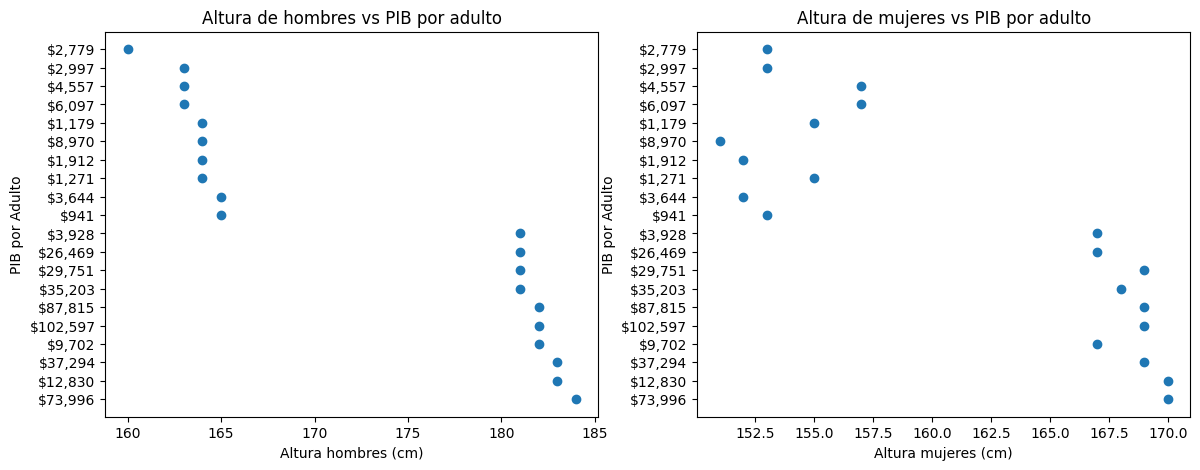

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de dispersión hombres
axes[0].scatter(merged['Hombres (cm)'], merged['PIB por Adulto (2022)'])
axes[0].set_title("Altura de hombres vs PIB por adulto")
axes[0].set_xlabel("Altura hombres (cm)")
axes[0].set_ylabel("PIB por Adulto")

# Gráfico de dispersión mujeres
axes[1].scatter(merged['Mujeres (cm)'], merged['PIB por Adulto (2022)'])
axes[1].set_title("Altura de mujeres vs PIB por adulto")
axes[1].set_xlabel("Altura mujeres (cm)")
axes[1].set_ylabel("PIB por Adulto")

plt.show()

A partir de los gráficos es posible visualizar que, a medida que aumenta la altura también aumenta el PIB por adulto, es decir, los países con hombres y mujeres de mayor altura (cm)  tienden a tener valores más altos de PIB en comparación con los países de menor altura, los cuales tienen un PIB por adulto más bajo.